In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("C:\\Users\\HP\\Downloads\\real_estate.csv")

In [4]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10-02-2020,Ashford,390 TURNPIKE RD,253000,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03-09-2021,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07-02-2021,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  int64  
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149864 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 106.5+ MB


In [6]:
df.isnull().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847349
OPM remarks         987279
Location            799516
dtype: int64

In [7]:
df.shape

(997213, 14)

In [8]:
df.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location'],
      dtype='object')

In [9]:
df["Sale Amount"]=df["Sale Amount"].astype("int32")

In [10]:
df["Location"].isnull().sum()

799516

In [11]:
# list(df["Location"].unique())

In [12]:
df["Location"]=df["Location"].fillna(df["Location"].mode()[0])

In [13]:
df.isnull().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847349
OPM remarks         987279
Location                 0
dtype: int64

In [14]:
a=list(df["OPM remarks"].unique())
len(a)

4826

In [15]:
4826*100/997213

0.48394876520863644

In [16]:
df.drop("OPM remarks",axis=1,inplace=True)

In [17]:
df.isnull().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847349
Location                 0
dtype: int64

In [18]:
df.drop(["Assessor Remarks","Non Use Code"],axis=1,inplace=True)

In [19]:
df.isnull().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Location                 0
dtype: int64

In [20]:
df["Residential Type"].isnull().sum()

388309

In [21]:
df["Residential Type"].unique()

array([nan, 'Single Family', 'Condo', 'Two Family', 'Three Family',
       'Four Family'], dtype=object)

In [22]:
df["Residential Type"].value_counts()

Residential Type
Single Family    445016
Condo            117780
Two Family        29609
Three Family      14081
Four Family        2418
Name: count, dtype: int64

In [23]:
df["Residential Type"].fillna(df["Residential Type"].mode()[0],inplace=True)

In [24]:
df["Residential Type"].value_counts()

Residential Type
Single Family    833325
Condo            117780
Two Family        29609
Three Family      14081
Four Family        2418
Name: count, dtype: int64

In [25]:
df["Residential Type"].isnull().sum()

0

In [26]:
df["Property Type"].fillna(df["Property Type"].mode()[0],inplace=True)

In [27]:
df["Residential Type"].isnull().sum()

0

In [28]:
df.isnull().sum()

Serial Number        0
List Year            0
Date Recorded        2
Town                 0
Address             51
Assessed Value       0
Sale Amount          0
Sales Ratio          0
Property Type        0
Residential Type     0
Location             0
dtype: int64

In [29]:
df.dropna(subset="Date Recorded",inplace=True)

In [30]:
df.dropna(subset="Address",inplace=True)

In [31]:
df.isnull().sum()

Serial Number       0
List Year           0
Date Recorded       0
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
Location            0
dtype: int64

In [32]:
a=df.groupby(["List Year"],as_index=False)["Sale Amount"].sum().sort_values(by="Sale Amount",ascending=False).head(15)
a

,List Year,Sale Amount
19,2020,33138270434
3,2004,31956284888
15,2016,25272800660
18,2019,24778187621
5,2006,23189453485
4,2005,22424828827
2,2003,21019603793
13,2014,19895675672
17,2018,19458446134
16,2017,17967079803


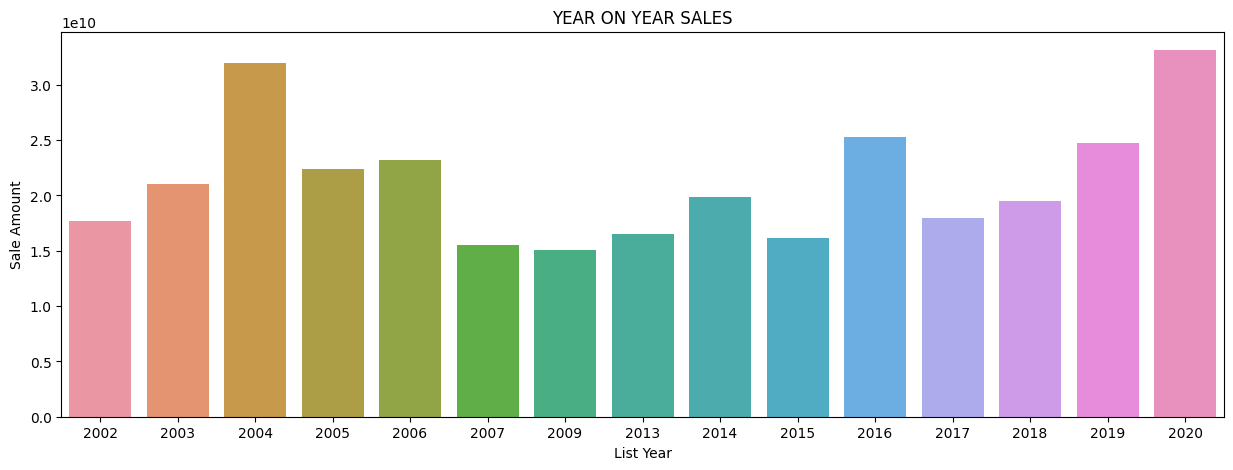

In [33]:
plt.figure(figsize=(15,5))
ab=sns.barplot(data=a, x="List Year", y="Sale Amount")
plt.title("YEAR ON YEAR SALES")
plt.show()


In [34]:
df.head(2)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500,325000,0.4630,Commercial,Single Family,POINT (-72.36336 41.97461)
1,20002,2020,10-02-2020,Ashford,390 TURNPIKE RD,253000,430000,0.5883,Residential,Single Family,POINT (-72.36336 41.97461)


In [70]:
c=df.groupby(["Property Type"],as_index=False)["Sale Amount"].sum().sort_values(by="Sale Amount",ascending=False)
c

,Property Type,Sale Amount
7,Single Family,314135262600
6,Residential,29110343989
2,Condo,27430942664
9,Two Family,5256145988
1,Commercial,3543779747
8,Three Family,2263523081
10,Vacant Land,935304073
3,Four Family,675725727
4,Industrial,456977530
5,Public Utility,1848544


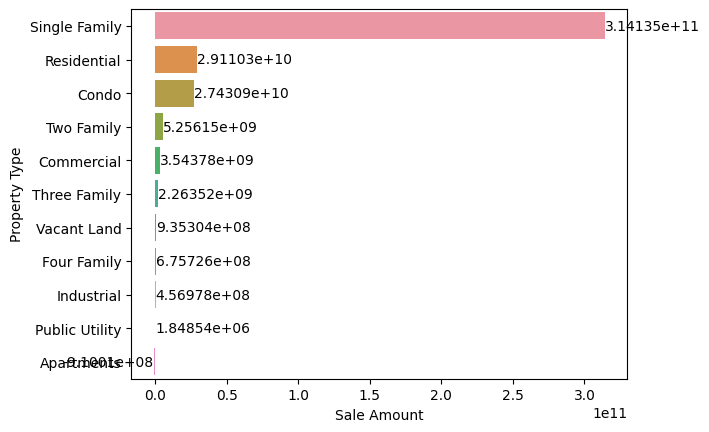

In [77]:
s=sns.barplot(data=c, y="Property Type",x="Sale Amount")
for x in s.containers:
    s.bar_label(x)
plt.show()

In [37]:
d=df.groupby(["Town","List Year"],as_index=False)["Sale Amount"].sum().sort_values(by="Sale Amount",ascending=False)
d

,Town,List Year,Sale Amount
2220,Stamford,2016,5339843096
2223,Stamford,2020,4361516173
937,Greenwich,2020,4229100675
924,Greenwich,2006,3295532409
923,Greenwich,2004,2880228074
...,...,...,...
1841,Pomfret,2015,85000
2377,Union,2003,50000
349,Canterbury,2004,15000
2274,Suffield,2003,9000


In [38]:
e=df.groupby(["Town"],as_index=False)["Sale Amount"].sum().sort_values(by="Sale Amount",ascending=False).head(10)
e

,Town,Sale Amount
57,Greenwich,36018599421
135,Stamford,28503055642
103,Norwalk,14347472575
158,Westport,12806596085
51,Fairfield,11136784056
35,Darien,10043331332
90,New Canaan,9488582914
34,Danbury,7874556154
154,West Hartford,7061730434
15,Bridgeport,6612329140


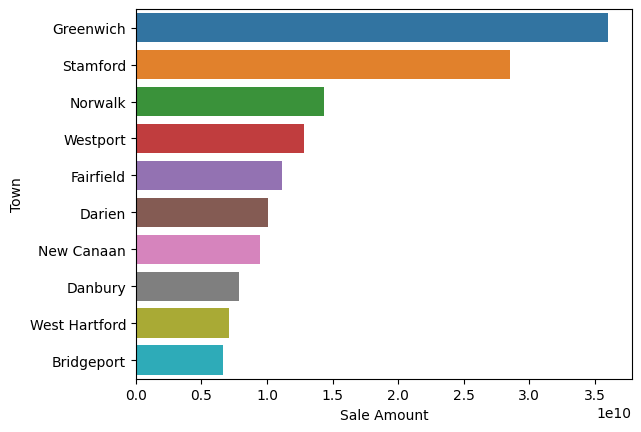

In [39]:
sns.barplot(data=e,y="Town",x="Sale Amount")
plt.show()

In [40]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500,325000,0.4630,Commercial,Single Family,POINT (-72.36336 41.97461)
1,20002,2020,10-02-2020,Ashford,390 TURNPIKE RD,253000,430000,0.5883,Residential,Single Family,POINT (-72.36336 41.97461)
2,200212,2020,03-09-2021,Avon,5 CHESTNUT DRIVE,130400,179900,0.7248,Residential,Condo,POINT (-72.36336 41.97461)
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000,0.6958,Residential,Single Family,POINT (-72.36336 41.97461)
4,200377,2020,07-02-2021,Avon,70 FAR HILLS DRIVE,862330,1447500,0.5957,Residential,Single Family,POINT (-72.36336 41.97461)


In [41]:
g=df.groupby(["List Year"],as_index=False)["Sales Ratio"].sum().sort_values(by="Sales Ratio", ascending=False).head()
g

,List Year,Sales Ratio
4,2005,4.682311e+06
5,2006,2.540212e+06
3,2004,7.752254e+05
17,2018,4.742004e+05
2,2003,3.430794e+05


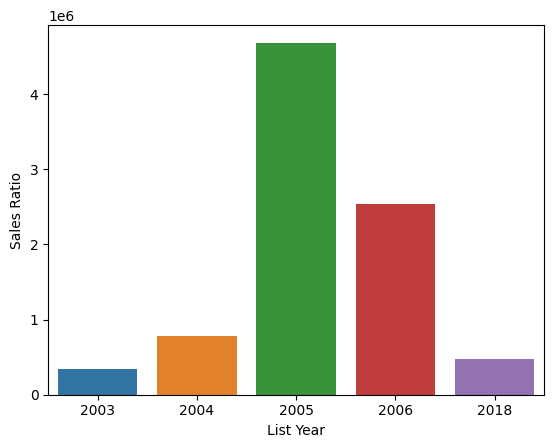

In [42]:
sns.barplot(data=g,x="List Year",y="Sales Ratio")
plt.show()

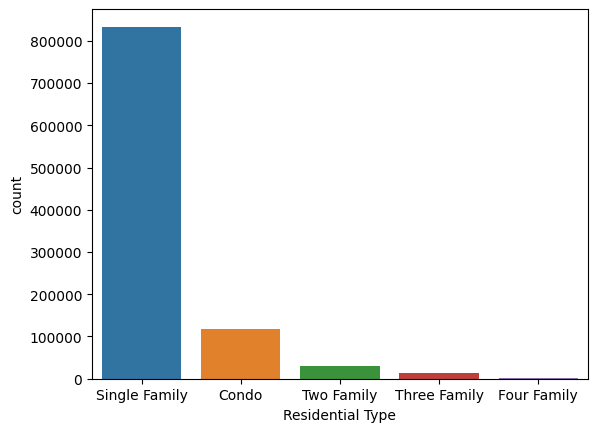

In [43]:
sns.countplot(data=df,x="Residential Type")
plt.show()

In [45]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500,325000,0.4630,Commercial,Single Family,POINT (-72.36336 41.97461)
1,20002,2020,10-02-2020,Ashford,390 TURNPIKE RD,253000,430000,0.5883,Residential,Single Family,POINT (-72.36336 41.97461)
2,200212,2020,03-09-2021,Avon,5 CHESTNUT DRIVE,130400,179900,0.7248,Residential,Condo,POINT (-72.36336 41.97461)
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000,0.6958,Residential,Single Family,POINT (-72.36336 41.97461)
4,200377,2020,07-02-2021,Avon,70 FAR HILLS DRIVE,862330,1447500,0.5957,Residential,Single Family,POINT (-72.36336 41.97461)


In [46]:
df["Sale Amount"].dtype

dtype('int32')

In [49]:
q=df.groupby(["Residential Type"],as_index=False)["Sale Amount"].sum().sort_values(by="Sale Amount",ascending=False)
q

,Residential Type,Sale Amount
2,Single Family,340489274352
0,Condo,32653298286
4,Two Family,6127529256
3,Three Family,2868236368
1,Four Family,761505232


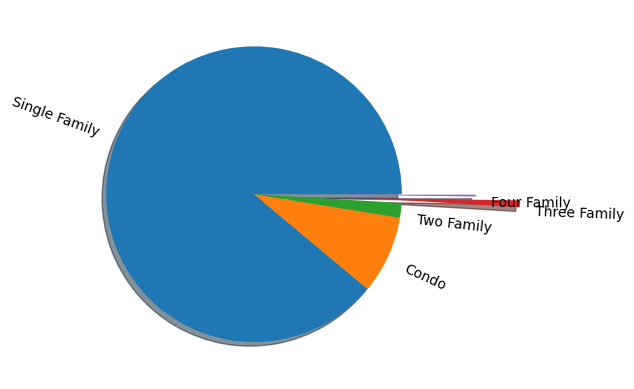

In [68]:
plt.pie(x=q["Sale Amount"],labels=q["Residential Type"],shadow =True,explode=[0,0,0,0.8,0.5],rotatelabels=True,data=q)
plt.show()

In [80]:
w=df.groupby(["Property Type"],as_index=False)["Sale Amount"].sum().sort_values(by="Sale Amount",ascending=False).head(10)
w

,Property Type,Sale Amount
7,Single Family,314135262600
6,Residential,29110343989
2,Condo,27430942664
9,Two Family,5256145988
1,Commercial,3543779747
8,Three Family,2263523081
10,Vacant Land,935304073
3,Four Family,675725727
4,Industrial,456977530
5,Public Utility,1848544


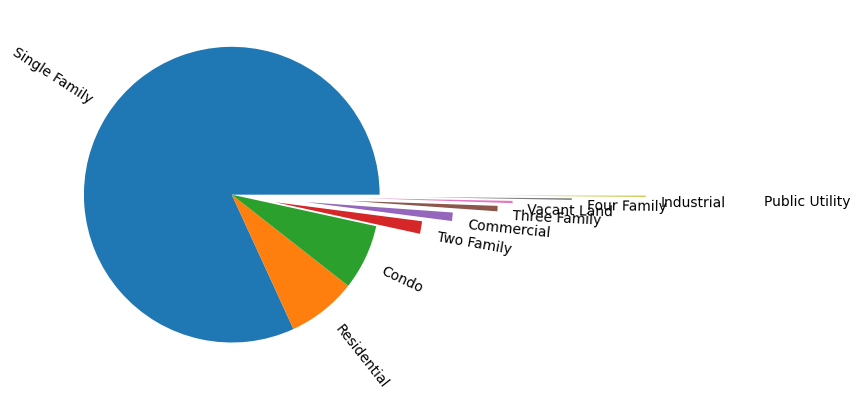

In [94]:
plt.pie(x=w["Sale Amount"],labels=w["Property Type"], rotatelabels=True,explode=[0,0,0,0.3,.5,.8,.9,1.3,1.8,2.5])
plt.show()